# РТ5-61Б Евсеев Г.А.

# Научно-исследовательская работа на тему "Прогнозирование продолжения обучения в университете"

## Поиск и выбор набора данных для построения моделей машинного обучения.

В качестве набора данных мы будем использовать набор данных 
по прогнозированию продолжения обучения в университете - https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset

Датасет состоит из одного файла: `data.csv`

Файл содержит следующие колонки:
- type_school - тип школы, которую посещал студент (Academic, Vocational).
- school_accreditation - качество школы (A, B).
- gender - Пол студента (Male, Female).
- interest - занитересованность студента в поступлении в университет(very, less, uncertain, quite, not).
- residence - местность проживания(rural - сельская, urban - городская).
- parent_age - возраст родителей.
- parent_salary - Заработок родителей.
- house_area - площадь родительского дома.
- average_grades - средняя оценка в школе.
- parent_was_in_college - были ли родители студента в университете(True, False).
- in_college – целевой признак датасета: поступил ли студент в университет(True, False). 

Будем решать задачу классификации: в качестве целевого признака будем использовать `in_college`. Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

### Импорт библиотек

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [8]:
original_train = pd.read_csv('data.csv', sep=",")

In [9]:
# Удалим дубликаты записей, если они присутствуют
train = original_train.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасета

In [10]:
# Первые 5 строк датасета
train.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [11]:
# Размер датасета - 5110 строк, 12 колонок
train.shape

(1000, 11)

In [12]:
# Список колонок
train.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [13]:
# Список колонок с типами данных 
train.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college       bool
in_college                  bool
dtype: object

In [14]:
train.nunique()

type_school                2
school_accreditation       2
gender                     2
interest                   5
residence                  2
parent_age                25
parent_salary            461
house_area               472
average_grades           684
parent_was_in_college      2
in_college                 2
dtype: int64

In [15]:
train.gender.value_counts()

Male      515
Female    485
Name: gender, dtype: int64

In [16]:
# Проверим наличие пустых значений
train.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

В нашем датасете отсутсвуют пропуски, поэтому обработка пропусков не требуется.

 Для удобства обработаем колонки данных: parent_was_in_college и in_college, преобразовав их из bool типа в int тип
 Для этого удостоверимся, что в данных колонках нету неопределенных значений

In [19]:
train['in_college'].unique()

array([ True, False])

In [20]:
train['parent_was_in_college'].unique()

array([False,  True])

In [21]:
train["in_college"] = train["in_college"].astype(int)

In [22]:
train['parent_was_in_college'] = train['parent_was_in_college'].astype(int)

Проверим правильность выполнения

In [24]:
train['in_college'].unique()

array([0, 1])

In [25]:
train['parent_was_in_college'].unique()

array([0, 1])

In [27]:
train.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,0,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,0,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,0,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,1,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,0,0


### Построение графиков для понимания структуры данных

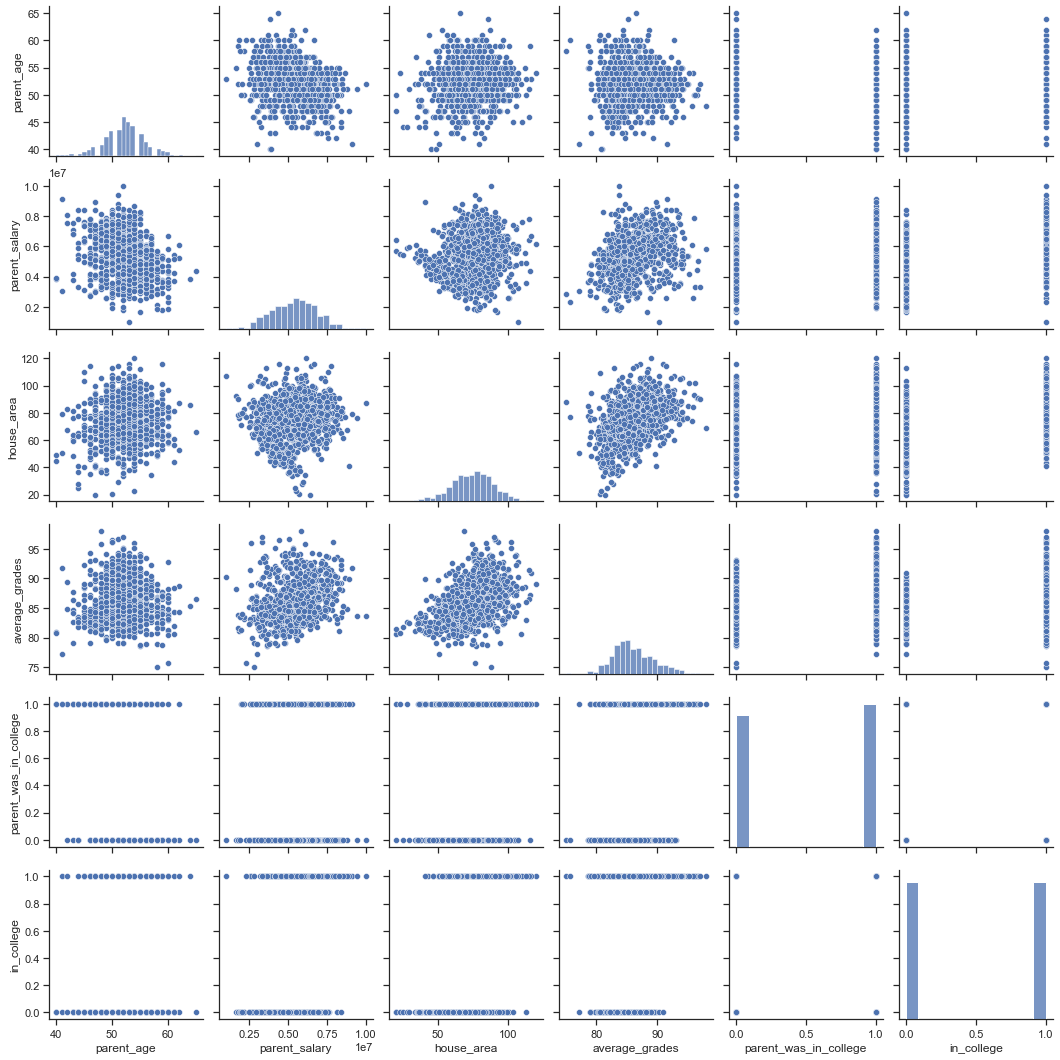

In [26]:
# Парные диаграммы
sns.pairplot(train)

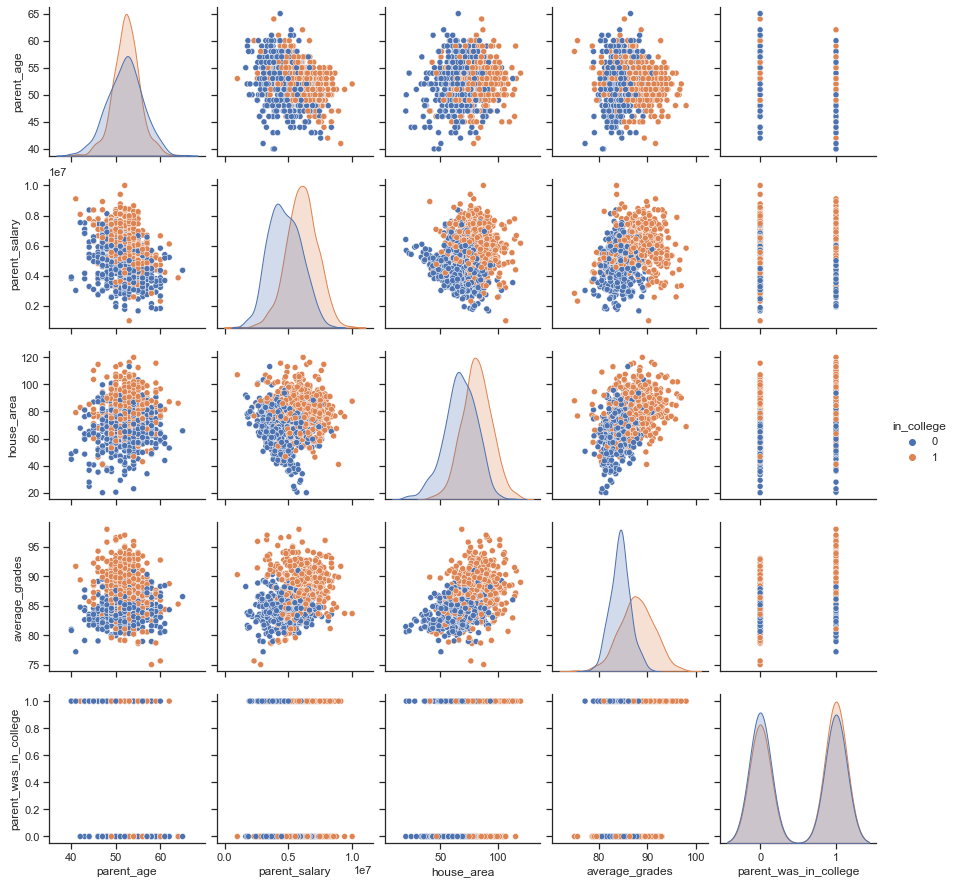

In [28]:
sns.pairplot(train, hue="in_college")

In [29]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['in_college'].unique()

array([1, 0])

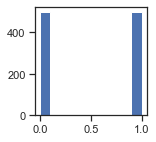

In [30]:
# Оценим дисбаланс классов для stroke
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['in_college'])
plt.show()

In [31]:
train['in_college'].value_counts()

1    500
0    500
Name: in_college, dtype: int64

In [32]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['in_college'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 50.0%, а класс 1 составляет 50.0%.


**Вывод. Дисбаланс классов отсутствует.**

In [33]:
train.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   int32  
 10  in_college             1000 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 118.2+ KB


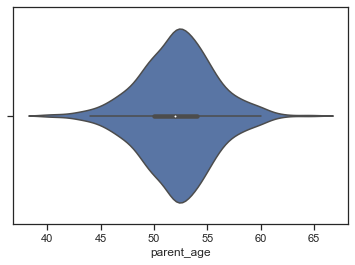

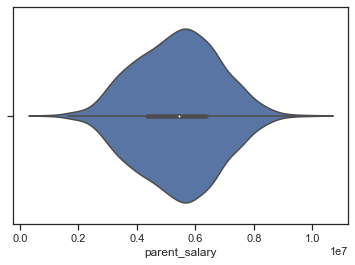

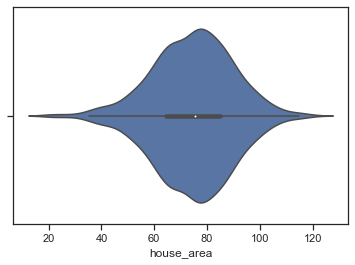

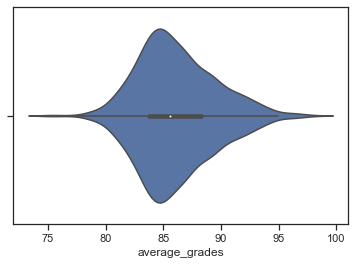

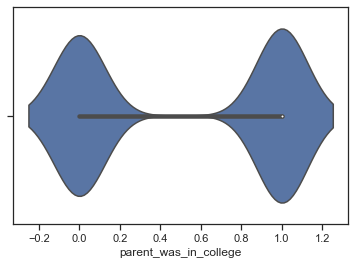

In [36]:
# Скрипичные диаграммы для числовых колонок
for col in ['parent_age', 'parent_salary', 'house_area', 'average_grades', 'parent_was_in_college']:
    sns.violinplot(x=train[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [37]:
train.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college      int32
in_college                 int32
dtype: object

Для построения моделей будем использовать все признаки.

Присутствуют категориальные признаки `type_school`, `school_accreditation`, `gender`, `interest`, `residence`, требуется их кодирование.

In [38]:
cat_columns = [cname for cname in train.columns
                        if train[cname].dtype == 'object']

for col in cat_columns:
    print('Уникальные значения признака '+ col + ': ', end='')
    print(train[col].unique())

Уникальные значения признака type_school: ['Academic' 'Vocational']
Уникальные значения признака school_accreditation: ['A' 'B']
Уникальные значения признака gender: ['Male' 'Female']
Уникальные значения признака interest: ['Less Interested' 'Very Interested' 'Uncertain' 'Not Interested'
 'Quiet Interested']
Уникальные значения признака residence: ['Urban' 'Rural']


In [39]:
cat_columns = [cname for cname in train.columns
                        if train[cname].dtype == 'object']

encoder = LabelEncoder()

for col in cat_columns:
    train[col] = encoder.fit_transform(train[col])

In [40]:
train.dtypes

type_school                int32
school_accreditation       int32
gender                     int32
interest                   int32
residence                  int32
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college      int32
in_college                 int32
dtype: object

In [41]:
train.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,1,0,1,56,6950000,83.0,84.09,0,1
1,0,0,1,0,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0


Вспомогательные признаки для улучшения качества моделей мы строить не будем.

Выполним масштабирование данных.

In [42]:
# Числовые колонки для масштабирования
scale_cols = ['type_school','school_accreditation','gender','interest','residence','parent_age','parent_salary','house_area','average_grades','parent_was_in_college']

In [43]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [44]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]

In [45]:
train.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,...,type_school_scaled,school_accreditation_scaled,gender_scaled,interest_scaled,residence_scaled,parent_age_scaled,parent_salary_scaled,house_area_scaled,average_grades_scaled,parent_was_in_college_scaled
0,0,0,1,0,1,56,6950000,83.0,84.09,0,...,0.0,0.0,1.0,0.0,1.0,0.64,0.661111,0.630,0.395217,0.0
1,0,0,1,0,1,57,4410000,76.8,86.91,0,...,0.0,0.0,1.0,0.0,1.0,0.68,0.378889,0.568,0.517826,0.0
2,0,1,0,4,1,50,6500000,80.6,87.43,0,...,0.0,1.0,0.0,1.0,1.0,0.40,0.611111,0.606,0.540435,0.0
3,1,1,1,4,0,49,6600000,78.2,82.12,1,...,1.0,1.0,1.0,1.0,0.0,0.36,0.622222,0.582,0.309565,1.0
4,0,0,0,4,1,57,5250000,75.1,86.79,0,...,0.0,0.0,0.0,1.0,1.0,0.68,0.472222,0.551,0.512609,0.0


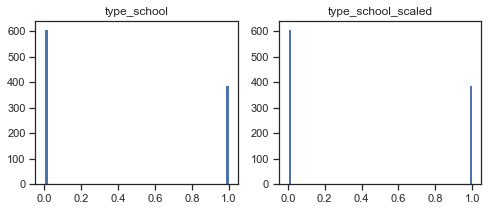

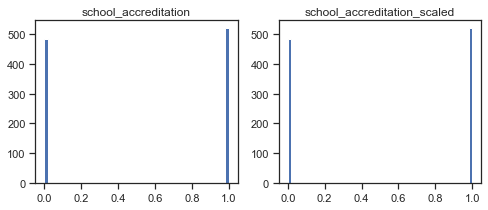

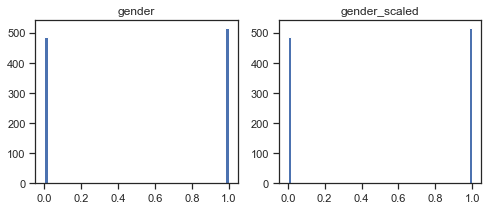

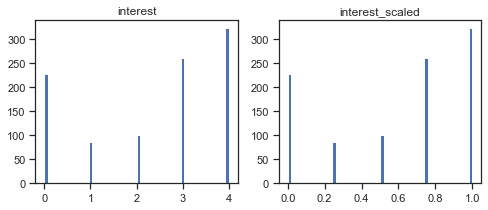

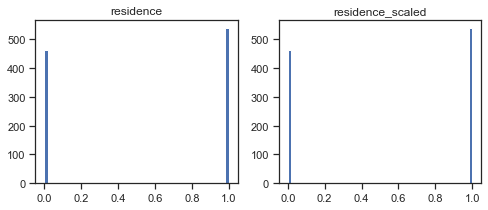

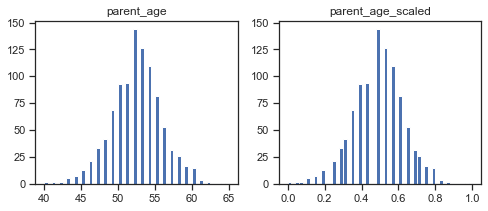

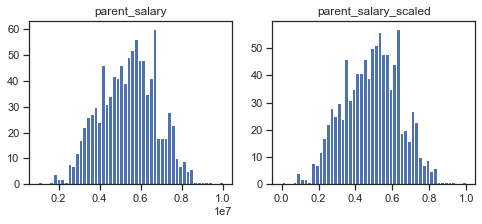

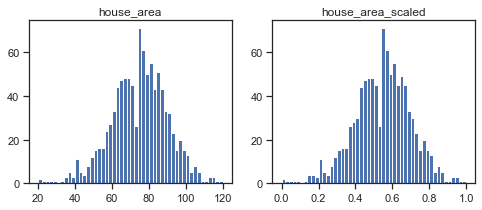

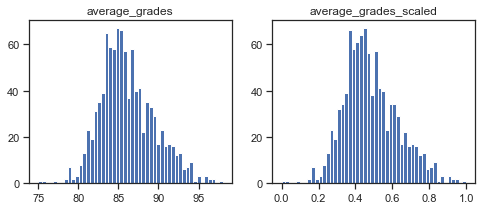

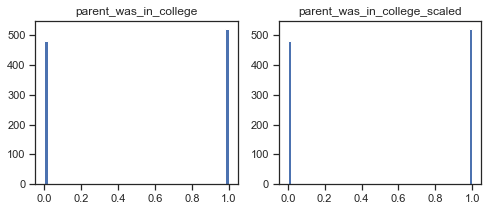

In [46]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train[col], 50)
    ax[1].hist(train[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [47]:
corr_cols_1 = scale_cols + ['in_college']
corr_cols_1

['type_school',
 'school_accreditation',
 'gender',
 'interest',
 'residence',
 'parent_age',
 'parent_salary',
 'house_area',
 'average_grades',
 'parent_was_in_college',
 'in_college']

In [48]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['in_college']
corr_cols_2

['type_school_scaled',
 'school_accreditation_scaled',
 'gender_scaled',
 'interest_scaled',
 'residence_scaled',
 'parent_age_scaled',
 'parent_salary_scaled',
 'house_area_scaled',
 'average_grades_scaled',
 'parent_was_in_college_scaled',
 'in_college']

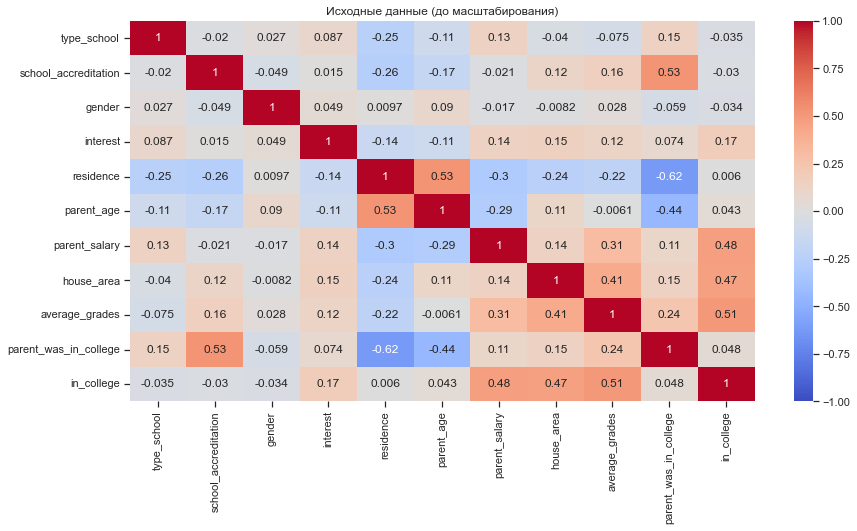

In [49]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_1].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

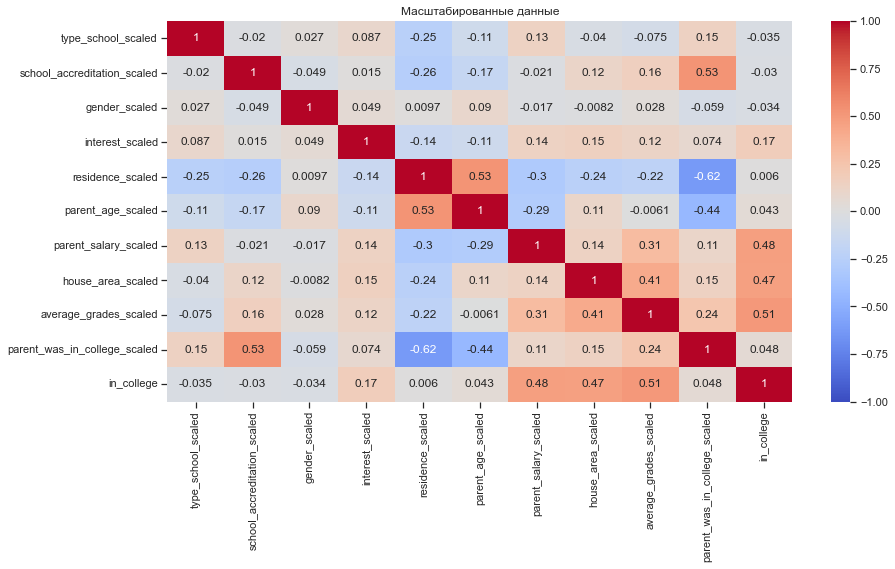

In [50]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_2].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Масштабированные данные')
plt.show()

In [53]:
print('Признаки, имеющие максимальную по модулю корреляцию с целевым признаком')
best_params = train[corr_cols_1].corr()['in_college'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.1]
best_params

Признаки, имеющие максимальную по модулю корреляцию с целевым признаком


average_grades    0.505133
parent_salary     0.475693
house_area        0.467267
interest          0.173998
Name: in_college, dtype: float64

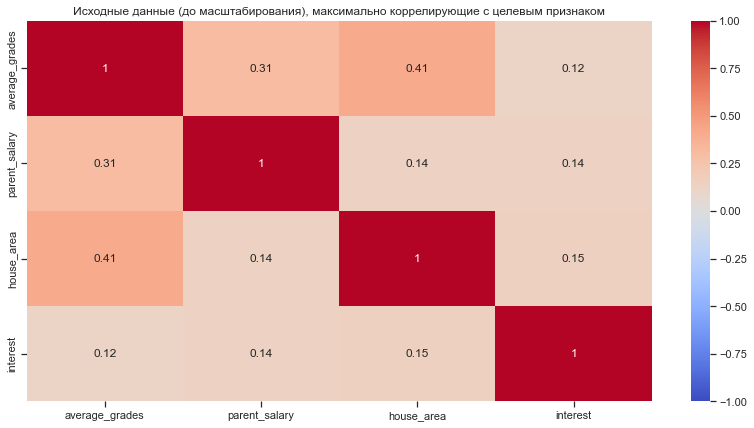

In [54]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования), максимально коррелирующие с целевым признаком')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации `in_college` наиболее сильно коррелирует с средними оценками в школе студента (0.50), заработной платой родителей (0.47), площадью дома (0.46), заинтересованностью в университете (0.17). Эти признаки обязательно следует оставить в модели классификации.

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [55]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи классификации.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [56]:
# Признаки для задачи классификации
task_clas_cols = ['average_grades_scaled', 'parent_salary_scaled', 
                  'house_area_scaled', 'interest_scaled']

In [59]:
y = train['in_college']
X = train[task_clas_cols]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 4), (300, 4), (700,), (300,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [61]:
# Модели
clas_models = {'LogR_l2-1.0-lbfgs': LogisticRegression(random_state=3), 
               'SVC_1.0':SVC(probability=True, random_state=3),
               'Tree_2':DecisionTreeClassifier(random_state=3),
               'RF_100-gini-auto-1':RandomForestClassifier(random_state=3),
               'GB_deviance-100-friedman_mse-1':GradientBoostingClassifier(random_state=3)}

In [62]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [63]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [64]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(x_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(x_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(x_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, x_test, y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

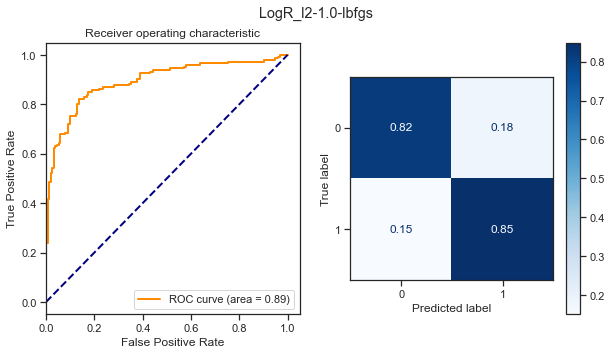

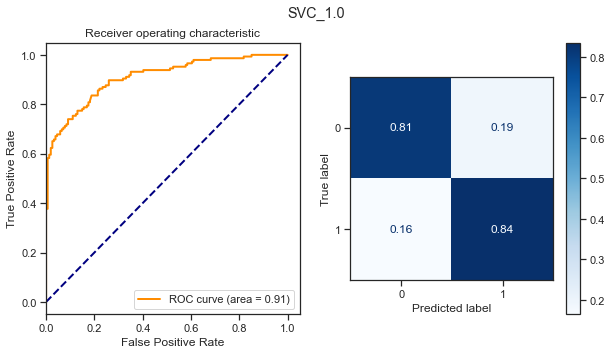

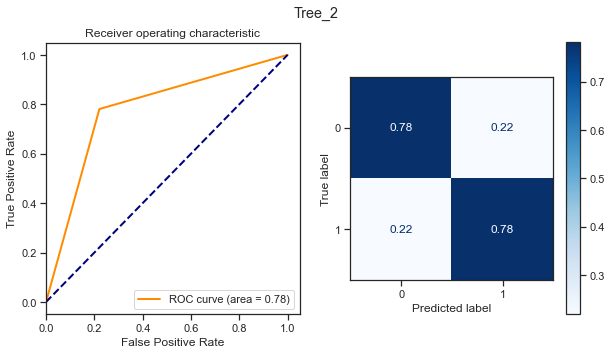

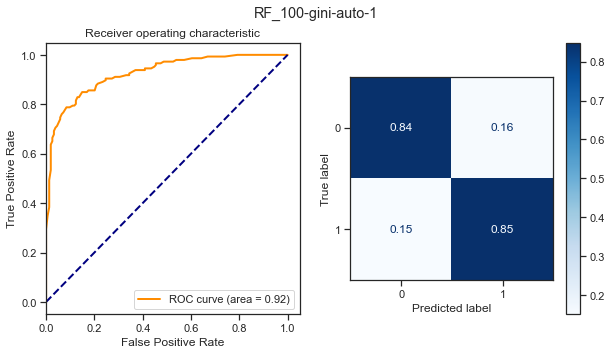

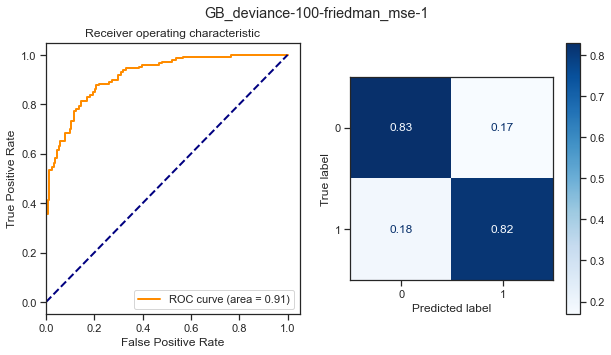

In [65]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров для выбранных моделей.

### Логистическая регрессия

In [66]:
x_train.shape

(700, 4)

In [67]:
params = {'penalty': ['l1','l2'],
         'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)]),
         'solver'  : ['liblinear', 'saga'],
         }

In [68]:
%%time
logR_gs = GridSearchCV(LogisticRegression(random_state=3), param_grid=params, cv=10, n_jobs=-1, scoring='roc_auc')
logR_gs.fit(x_train, y_train)

Wall time: 4.23 s


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=3), n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  3. ,  4. ,
        5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. , 14. ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [69]:
logR_gs.best_estimator_

LogisticRegression(C=9.0, random_state=3, solver='liblinear')

In [70]:
logR_gs_best_params_txt = str(logR_gs.best_params_['penalty']) + '-' + str(logR_gs.best_params_['C']) + '-' + str(logR_gs.best_params_['solver'])
logR_gs_best_params_txt

'l2-9.0-liblinear'

Таким образом, наилучшие параметры для модели логистической регрессии: `C=9.0`, `solver='liblinear'`, `penalty='l2'`.

### Машина опорных векторов

In [71]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}

In [72]:
%%time
SVC_gs = GridSearchCV(SVC(probability=True, random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
SVC_gs.fit(x_train, y_train)

Wall time: 1.66 s


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=3), n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  3. ,  4. ,
        5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. , 14. ])},
             scoring='roc_auc')

In [73]:
SVC_gs.best_estimator_

SVC(C=10.0, probability=True, random_state=3)

In [74]:
SVC_gs_best_params_txt = str(SVC_gs.best_params_['C'])
SVC_gs_best_params_txt

'10.0'

Таким образом, наилучшие параметры для модели машины опорных векторов: `C=10.0`.

### Решающее дерево

In [75]:
params = {'min_samples_leaf': range(3, 30)}

In [76]:
%%time
desTreeClas_gs = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
desTreeClas_gs.fit(x_train, y_train)

Wall time: 215 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'min_samples_leaf': range(3, 30)}, scoring='roc_auc')

In [77]:
desTreeClas_gs.best_estimator_

DecisionTreeClassifier(min_samples_leaf=27, random_state=3)

In [78]:
desTreeClas_gs_best_params_txt = str(desTreeClas_gs.best_params_['min_samples_leaf'])
desTreeClas_gs_best_params_txt

'27'

Таким образом, наилучшие параметры для модели решающего дерева: `min_samples_leaf=27`.

### Случайный лес

In [79]:
params = {'n_estimators': [100, 1000], 'criterion': ['gini', 'entropy'], 
          'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 3, 5]}

In [80]:
%%time
randForestClas_gs = GridSearchCV(RandomForestClassifier(random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
randForestClas_gs.fit(x_train, y_train)

Wall time: 32.3 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 1000]},
             scoring='roc_auc')

In [81]:
randForestClas_gs.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=3)

In [82]:
randForestClas_gs_best_params_txt = str(randForestClas_gs.best_params_['n_estimators']) + '-' + str(randForestClas_gs.best_params_['criterion']) + '-' + str(randForestClas_gs.best_params_['max_features']) + '-' + str(randForestClas_gs.best_params_['min_samples_leaf'])
randForestClas_gs_best_params_txt

'1000-entropy-auto-1'

Таким образом, наилучшие параметры для модели случайного леса: `n_estimators=1000`, `criterion='entropy'`, `max_features='auto'`, `min_samples_leaf=1`.

### Градиентный бустинг

In [83]:
params = {'loss': ['deviance', 'exponential'], 'n_estimators': [10, 50, 100, 200], 
          'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'], 'min_samples_leaf': [1, 3, 5]}

In [91]:
%%time
warnings.filterwarnings('ignore')
GrBoostClas_gs = GridSearchCV(GradientBoostingClassifier(random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
GrBoostClas_gs.fit(x_train, y_train)

Wall time: 14.6 s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=3),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [92]:
GrBoostClas_gs.best_estimator_

GradientBoostingClassifier(loss='exponential', n_estimators=200, random_state=3)

In [93]:
GrBoostClas_gs_best_params_txt = str(GrBoostClas_gs.best_params_['loss']) + '-' + str(GrBoostClas_gs.best_params_['n_estimators']) + '-' + str(GrBoostClas_gs.best_params_['criterion']) + '-' + str(GrBoostClas_gs.best_params_['min_samples_leaf'])
GrBoostClas_gs_best_params_txt

'exponential-200-friedman_mse-1'

Таким образом, наилучшие параметры для модели градиентного бустинга: `loss='exponential'`, `n_estimators=200`, `criterion='friedman_mse'`, `min_samples_leaf=1`.

## Построение решения для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи классификации

In [106]:
clas_models_grid = {'LogR_l2-9.0-liblinear': LogisticRegression(random_state=3),
                   str('LogR_' + logR_gs_best_params_txt):logR_gs.best_estimator_,
                   'SVC_10.0': SVC(probability=True, random_state=3),
                   str('SVC_' + SVC_gs_best_params_txt):SVC_gs.best_estimator_,
                   'Tree_27': DecisionTreeClassifier(random_state=3),
                   str('Tree_' + desTreeClas_gs_best_params_txt):desTreeClas_gs.best_estimator_,
                   'RF_1000-entropy-auto-1': RandomForestClassifier(random_state=3),
                   str('RF_' + randForestClas_gs_best_params_txt):randForestClas_gs.best_estimator_,
                   'GB_exponential-200-friedman_mse-1': GradientBoostingClassifier(random_state=3),
                   str('GB_' + GrBoostClas_gs_best_params_txt):GrBoostClas_gs.best_estimator_
                   }

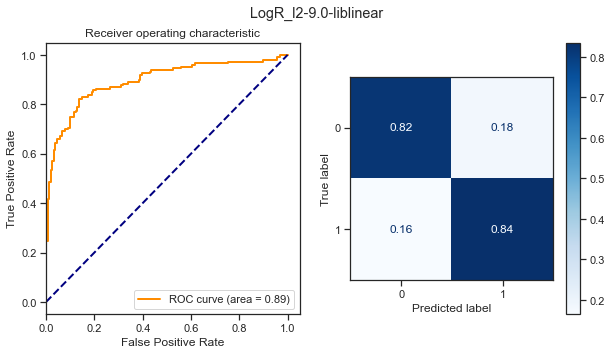

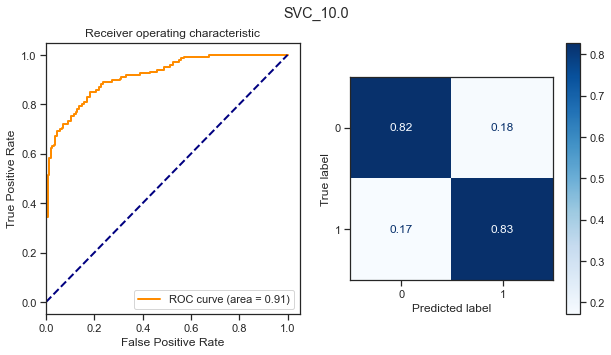

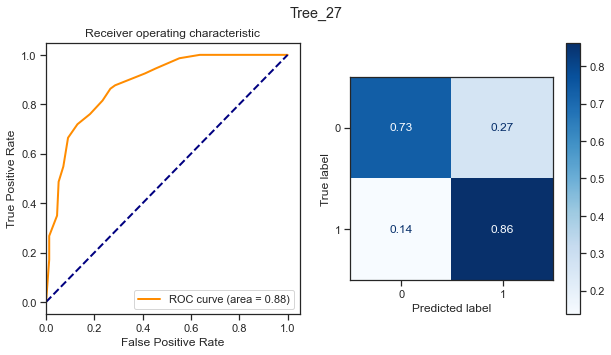

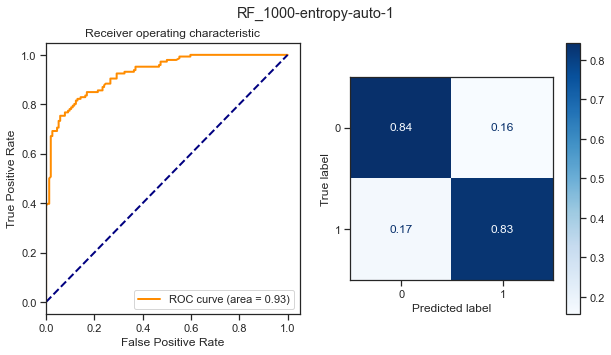

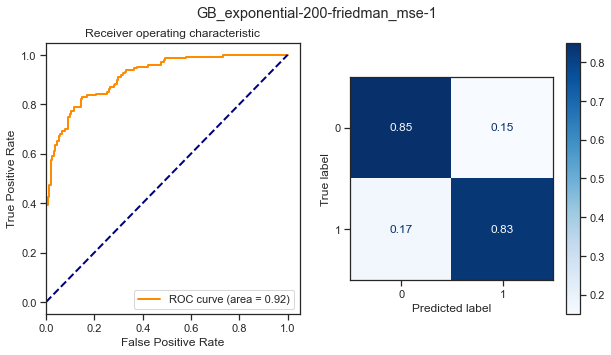

In [107]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [108]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

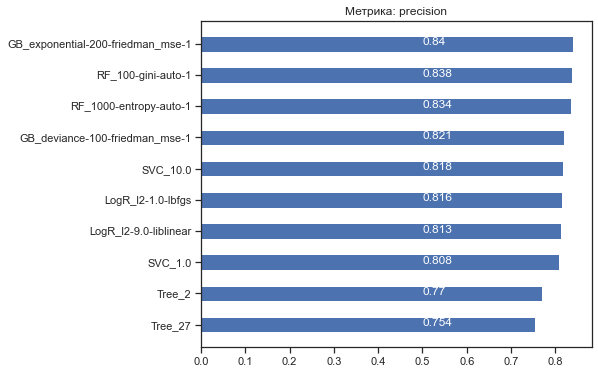

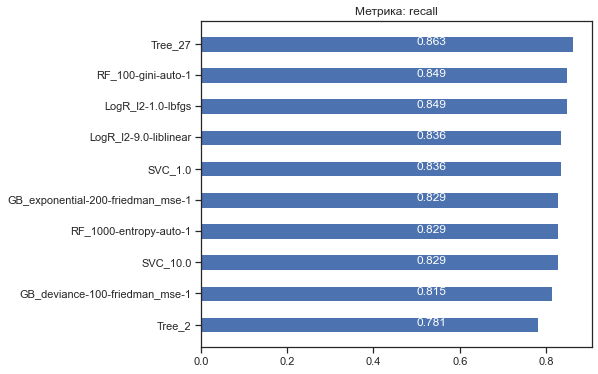

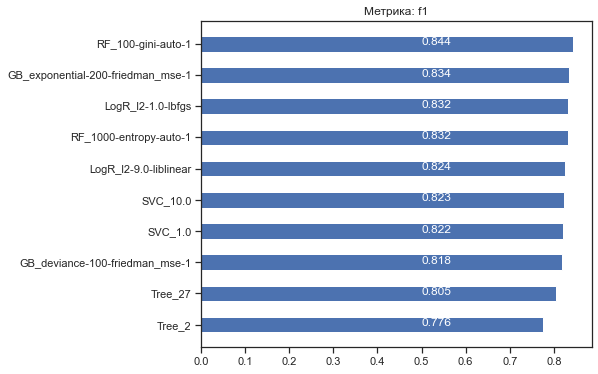

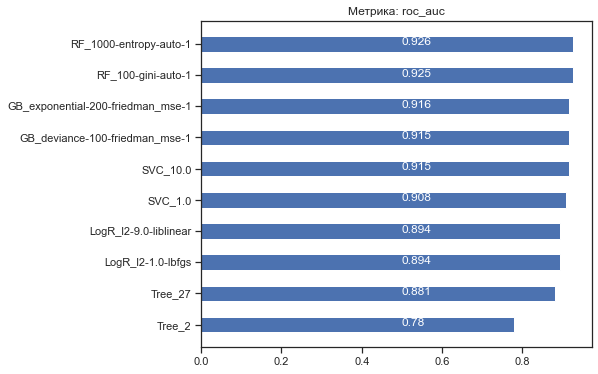

In [109]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

**Вывод. На основании метрики точности,  лучшей оказалась модель градиетного бустинга. На основании метрики recall лучшей оказала модель решающего дерева. На основании метрики f1, лучшей оказалась модель случайного дерева, и на основании метрики roc_aur лучшей модейлью оказалась также модель случайного дерева. Таким образом, все модели показывают высокие результаты в разных метриках, но более оптимальной является модель случайного дерева на основании двух метрик(f1,roc_aur)**